In [76]:
# ingest the data

In [77]:
import pandas as pd

In [112]:

df = pd.read_csv("E:/Ineuron_Project/notebooks/data/cubic_zirconia.csv")

In [79]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [80]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [81]:
df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26150,26151,1.00,Good,E,SI2,63.3,55.0,6.25,6.29,3.97,4312
16413,16414,0.77,Ideal,D,VS2,61.8,56.0,5.90,5.84,3.63,3755
4112,4113,1.50,Very Good,E,VS2,60.7,60.0,7.32,7.41,4.47,14256
17751,17752,0.51,Ideal,H,VS2,61.6,55.0,5.16,5.19,3.19,1375
10708,10709,1.00,Premium,E,SI2,61.0,59.0,6.40,6.33,3.89,3752


In [82]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [83]:
df['depth'].fillna(df['depth'].mean(), inplace=True)

C:\Users\BKVY\AppData\Local\Temp\ipykernel_5996\2318141379.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['depth'].fillna(df['depth'].mean(), inplace=True)


In [84]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26967 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [86]:
data = df.drop(labels=["Unnamed: 0"], axis=1 )

In [87]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
26962    False
26963    False
26964    False
26965    False
26966    False
Length: 26967, dtype: bool

In [88]:
data.shape

(26967, 10)

In [89]:
categorical_colums = data.columns[data.dtypes == 'object']

In [90]:
numerical_colums = data.columns[data.dtypes != 'object']

In [91]:
data[categorical_colums].describe()

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [92]:
data[numerical_colums].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26967.0,61.745147,1.394481,50.8,61.10,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [93]:
data[categorical_colums]['cut'].value_counts()

cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: count, dtype: int64

In [94]:
data[categorical_colums]['color'].value_counts()

color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: count, dtype: int64

In [95]:
data[categorical_colums]['clarity'].value_counts()

clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: count, dtype: int64

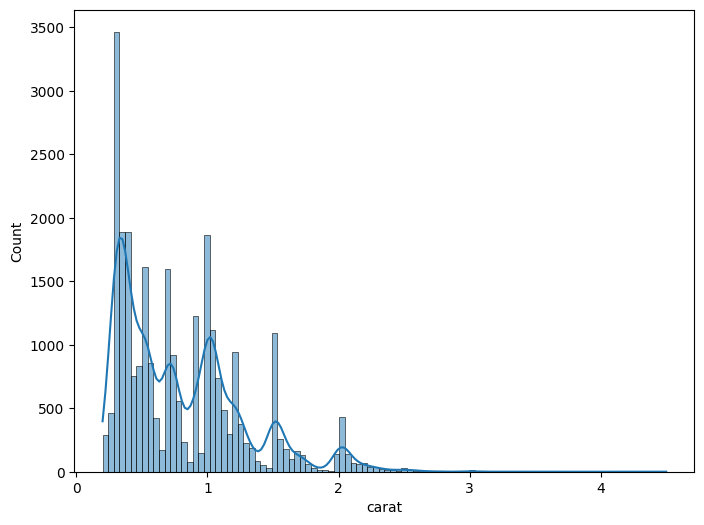

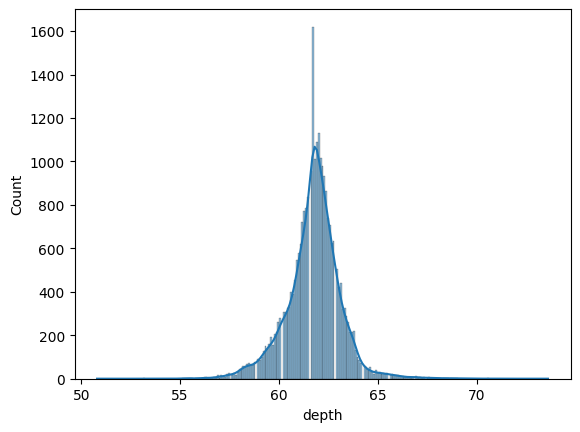

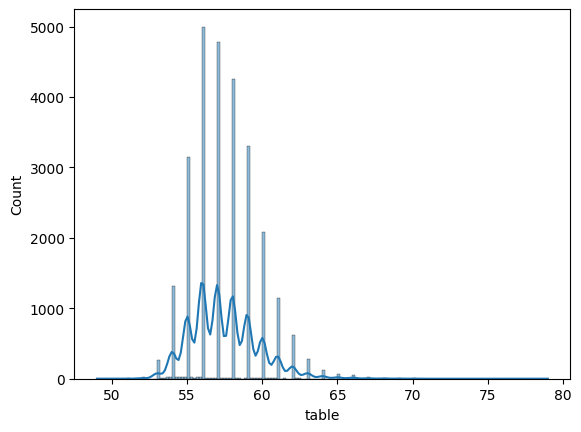

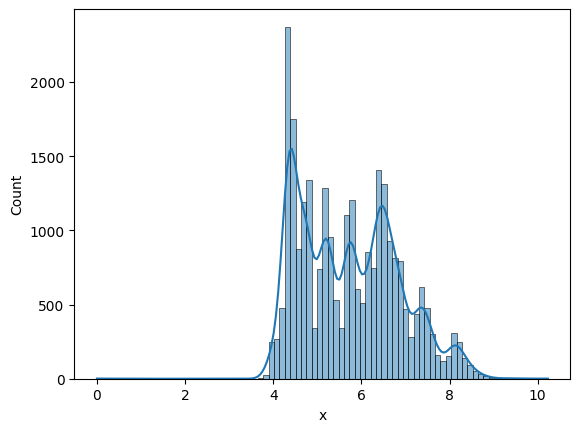

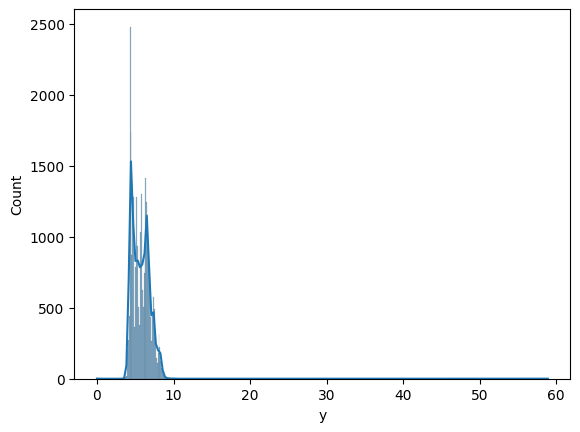

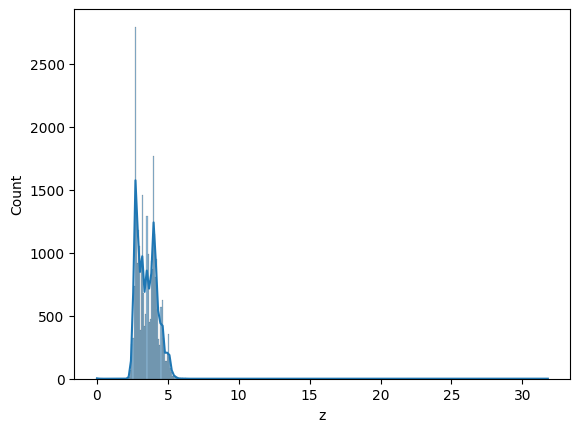

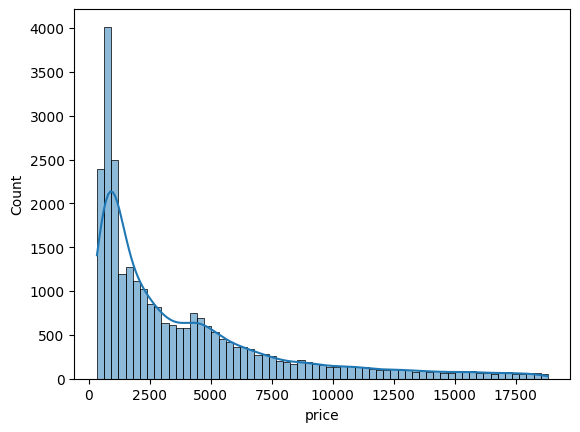

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))


for col in numerical_colums:
    sns.histplot(data=data,x=col,kde=True)

    print("\n")
    plt.show()

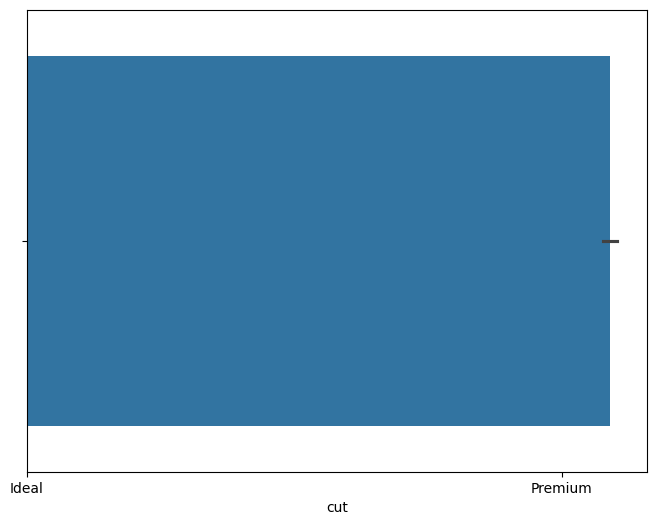

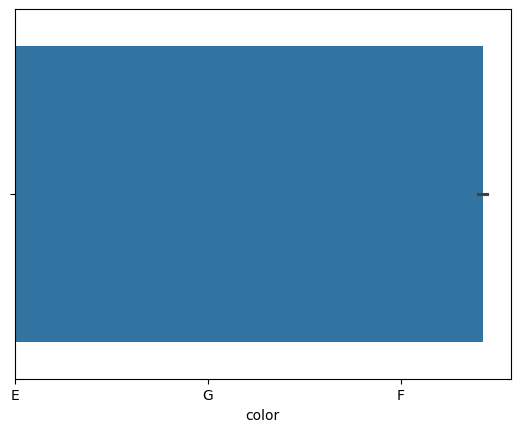

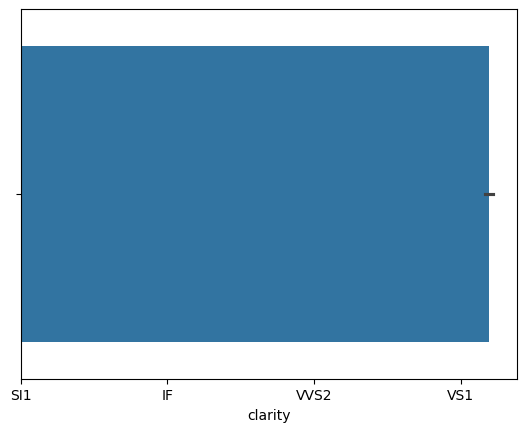

In [97]:
plt.figure(figsize=(8,6))


for col in categorical_colums:
    sns.barplot(data=data,x=col)

    print("\n")
    plt.show()

<Axes: >

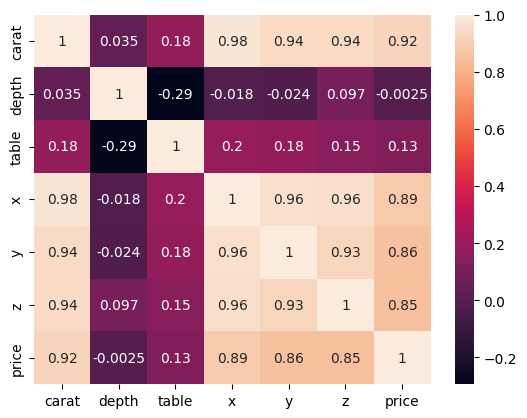

In [98]:
sns.heatmap(data[numerical_colums].corr(),annot=True)

In [99]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [115]:
# encoding
data['clarity'].unique()

array([nan])

In [116]:
data['cut'].unique()

array([nan])

In [117]:
data['color'].unique()

array([nan])

In [119]:
# it is ordinal encoding
cut_map = {'Ideal':5, 'Premium':4, 'Very Good':3, 'Good':2, 'Fair:':1}
clarity_map = {'SI1':1, 'IF':2, 'VVS2':3, 'VS1':4, 'VVS1':5, 'VS2':6, 'SI2':7, 'I1':8}
color_map = {'E': 1, 'G': 2, 'F': 3, 'D': 4, 'H': 5, 'J': 6, 'I': 7}

In [120]:
# it is ordinal encoding
cut_map = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 6}
clarity_map = {"SI1": 1, "IF": 2, "WS2": 3, "VS1": 4, "WS1": 5, "VS2": 6, "SI2": 7, "I1": 8}
color_map = {'E': 1, 'G': 2, 'F': 3, 'D': 4, 'H': 5, 'J': 6, 'I': 7}

In [121]:
data["cut"] = data["cut"].map(cut_map)
data["clarity"] = data["clarity"].map(clarity_map)
data["color"] = data["color"].map(color_map)


In [122]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,NaN,NaN,NaN,62.1,58.0,4.27,4.29,2.66,499
1,0.33,NaN,NaN,NaN,60.8,58.0,4.42,4.46,2.70,984
2,0.90,NaN,NaN,NaN,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,NaN,NaN,NaN,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,NaN,NaN,NaN,60.4,59.0,4.35,4.43,2.65,779
